# Tutorial Problem: Week of 14 Oct 2024. Handling Imbalanced Datasets Using Sampling Techniques

## Objective:
In this exercise, you will learn to handle imbalanced datasets using different sampling techniques and analyze how they affect model performance. You will use oversampling, undersampling, and hybrid methods to balance the dataset and evaluate their impact on model metrics.

## Steps:

### 1. Dataset Selection:
- Find an imbalanced dataset with a small number of classes (preferably binary classification) on platforms like GitHub or Kaggle. 
- Sample dataset: url= https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

### 2. Preprocessing:
- Split the dataset into training and testing sets.

### 3. Balancing the Dataset:
- Apply the following techniques to handle class imbalance:
  - Random Oversampling
  - Random Undersampling
  - Tomek Links
  - SMOTE (Synthetic Minority Over-sampling Technique)
  - Class Weighing

### 4. Model Training:
- Train any one machine learning model (e.g., SVM, LDA, Decision Tree, etc.) on the original imbalanced dataset as well as the balanced datasets generated by each technique.

### 5. Performance Evaluation:
- Compute the following performance metrics for each model:
  - Accuracy
  - F1 Score
  - AUC (Area Under the Curve)

### 6. Comparison:
- Compare the performance metrics across the different sampling techniques and the original dataset.
- Identify which technique led to the best improvement in model performance.

### 7. Submission:
- Create a GitHub repository for this assignment, and make it public.
- Upload your dataset, code, and results to the repository.
- Share the link to your GitHub repo.

## Deliverables:

- Model performance comparison table.
- GitHub repo link containing the code, dataset, and analysis.


## Solution

# What is Imbalanced Data?

Imbalanced data in machine learning refers to the situation where the distribution of classes in the target variable is not equal. This can occur in both binary and multiclass classification problems:

- In a **binary classification problem**, one class may have significantly more instances than the other class.
  
- In a **multiclass classification problem**, one or more classes may have significantly fewer instances than the other classes.

If not addressed correctly, it can lead to:
- Biased decision boundaries
- Inaccurate predictions
- Misleading model performance

## What causes Imbalanced Data?

There are mainly two reasons that lead to an imbalanced dataset:
1. **Nature of the problem itself**: Some real-world problems naturally lead to imbalanced datasets.
2. **Biases in data collection or sampling methods**.

### Below are some real-world problems that involve imbalanced data:

1. **Fraudulent Transaction Detection**: Most transactions are genuine, while only a small fraction is fraudulent.
2. **Ad Serving and Click Prediction**: Most users do not click on ads, leading to the majority of data belonging to non-clickers and only a small portion belonging to clickers.

 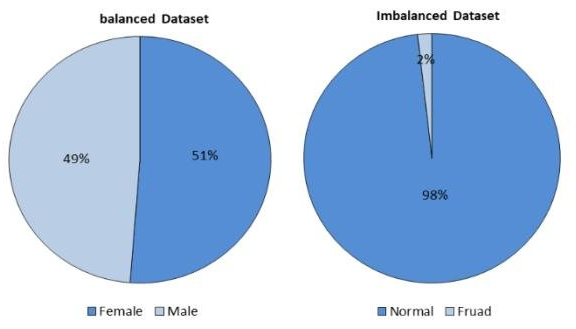

## 3. Effect on Decision Boundary & Predictions

Imbalanced data can cause classification algorithms to have a biased decision boundary, favoring the majority class. This leads to poor performance and low prediction accuracy for the minority class. Below are the effects on common ML algorithms:


## 5. Techniques to Handle Imbalanced Data

In cases of imbalanced data, decision boundaries established by the algorithms tend to favor the majority class, leading to incorrect classification of the minority class.

To solve this problem, it is necessary to use metrics that take the imbalance into account and apply techniques to address this issue. Sampling techniques such as Undersampling and Oversampling are standard methods for dealing with class imbalance.There are two main approaches to reduce the effect of imbalanced data: 
**Data-level techniques** and **Algorithm-level techniques**.

### a. Data-Level Techniques:
1. **Oversampling**: Increase the minority class representation by replicating samples.

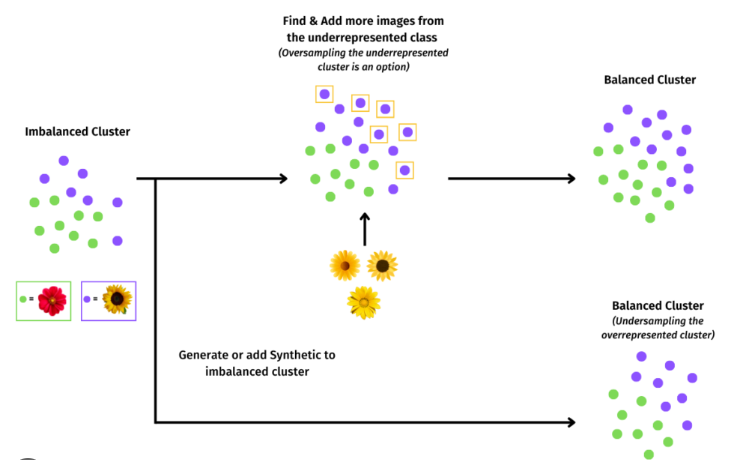



2. **Undersampling**: Reduce the majority class representation by removing samples.
3. **SMOTE**: Create synthetic samples for the minority class to balance the dataset.


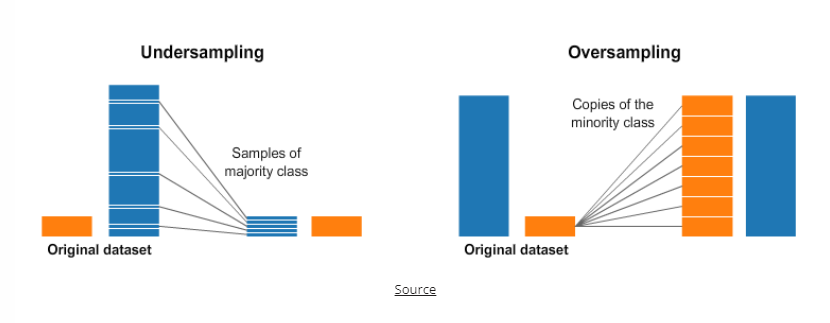

### b. Algorithm-Level Techniques:
1. **Cost-sensitive learning**: Assign different costs to misclassification errors for different classes.
2. **Class Weighing**: Automatically adjust the weights according to class frequencies during model training.




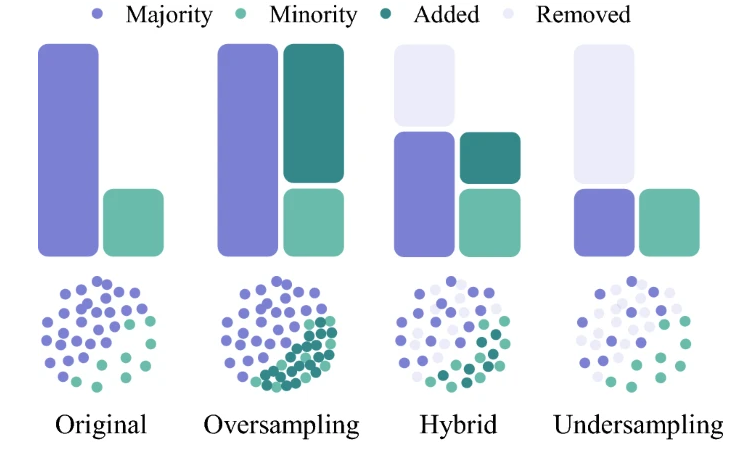

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import TomekLinks
from sklearn.utils.class_weight import compute_class_weight 

In [2]:
# Load dataset (update the path to your dataset)
url= 'creditcard.csv'
data = pd.read_csv(url) 

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(data.info())
print(data['Class'].value_counts())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

C:\Users\hp\AppData\Local\Temp\ipykernel_31552\2409256313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')


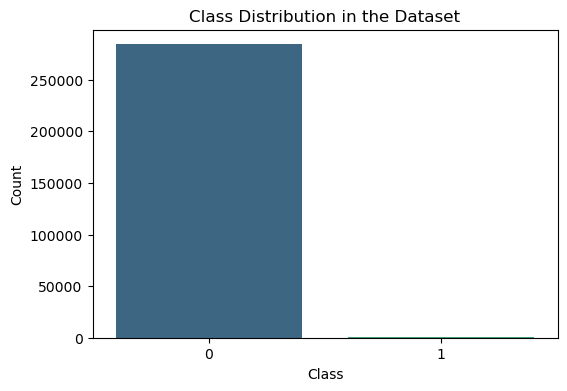

In [5]:
# 1. Plot the class distribution to show imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()




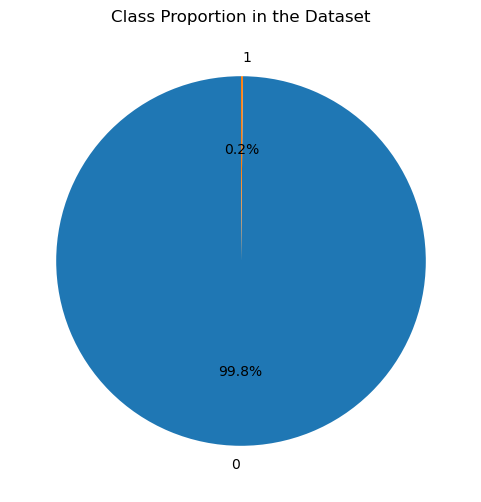

In [7]:
# 2. Plot a pie chart to visualize class proportions
plt.figure(figsize=(6, 6))
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Proportion in the Dataset')
plt.show()

In [8]:
# Split the dataset into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [9]:
# Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train) 

In [10]:
# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train) 

In [11]:
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train) 

In [12]:
# Tomek Links
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train) 

In [13]:
# Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights)) 

In [14]:
# Function to evaluate model performance
def evaluate_model(X_train, y_train, X_test, y_test, class_weights=None):
    model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob)) 

In [15]:
# Evaluate each sampling technique
print("Random Undersampling:")
evaluate_model(X_rus, y_rus, X_test, y_test)

print("\nRandom Oversampling:")
evaluate_model(X_ros, y_ros, X_test, y_test)

print("\nSMOTE:")
evaluate_model(X_smote, y_smote, X_test, y_test)

print("\nTomek Links:")
evaluate_model(X_tl, y_tl, X_test, y_test)

print("\nClass Weights:")
evaluate_model(X_train, y_train, X_test, y_test, class_weights_dict) 

Random Undersampling:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.94      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962

AUC: 0.9792578856247057

Random Oversampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

AUC: 0.9525372209238225

SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94     

In [16]:
# finished 